# Part II - (Ford Bike System Data)
## by (Arnold Nambubbi)



## Investigation Overview
The features affecting bike usage. Main features taken into account are user_type, day of the week (weekday or weekend) and time of the day.


## Dataset Overview
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
%matplotlib inline

In [2]:
# Making a list of all the zip files
zipped = glob.glob('./data/*.zip')
# Extract all zipfile using zipfile library
for zip_file in zipped:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall("./data/")

In [3]:
file_list = glob.glob('./data/*.csv') 

In [4]:
ford_bike = pd.read_csv('201902-fordgobike-tripdata.csv')
ford_bike.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
153702,850,2019-02-06 11:47:15.5860,2019-02-06 12:01:26.4470,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,66.0,3rd St at Townsend St,37.778742,-122.392741,5573,Subscriber,1993.0,Male,Yes
91901,1005,2019-02-15 21:17:36.8050,2019-02-15 21:34:21.8760,66.0,3rd St at Townsend St,37.778742,-122.392741,349.0,Howard St at Mary St,37.781010,-122.405666,5382,Customer,1995.0,Male,No
124455,259,2019-02-11 08:35:50.1950,2019-02-11 08:40:10.0930,129.0,Harrison St at 20th St,37.758862,-122.412544,108.0,16th St Mission BART,37.764710,-122.419957,5522,Subscriber,1994.0,Male,No
69043,405,2019-02-19 20:22:45.6800,2019-02-19 20:29:30.7130,181.0,Grand Ave at Webster St,37.811377,-122.265192,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,3626,Subscriber,1986.0,Male,No
76773,613,2019-02-19 07:58:38.7310,2019-02-19 08:08:51.7510,22.0,Howard St at Beale St,37.789756,-122.394643,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,47,Subscriber,1975.0,Male,No


In [5]:
#make a copy of the ford_bike dataset
ford_bike_clean = ford_bike.copy()
ford_bike_clean.start_time = pd.to_datetime(ford_bike_clean.start_time, yearfirst=True)
ford_bike_clean.end_time = pd.to_datetime(ford_bike_clean.end_time, yearfirst=True)
ford_bike_clean.start_station_id = ford_bike_clean.start_station_id.astype(str)
ford_bike_clean.end_station_id = ford_bike_clean.end_station_id.astype(str)
ford_bike_clean.bike_id = ford_bike_clean.bike_id.astype(str)
ford_bike_clean.member_gender = ford_bike_clean.member_gender.astype('category')
ford_bike_clean.user_type = ford_bike_clean.user_type.astype('category')
ford_bike_clean['day_of_the_week'] = ford_bike_clean['start_time'].dt.day_name()
ford_bike_clean['hour'] = ford_bike_clean['start_time'].dt.hour

## (Visualization 1)
Does the day of the week (Weekday or Weekend) affect the number of bike users?


In [6]:
#Defining a function to label x-y axis and title
def label(x, y, t):
    """
    x(str): x-axis title
    y(str): y-axis title
    t(str): main title
    Returns:
    None
    """
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

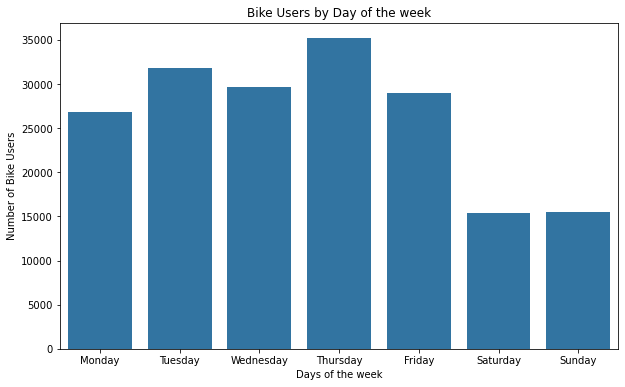

In [7]:
#Plotting a bar chart to visualize the bike users based on day_of_the_week
day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(10,6))     
base_color = sns.color_palette()[0]
ax = sns.countplot(data=ford_bike_clean, x ='day_of_the_week', color=base_color, order=day)
cat_counts = ford_bike_clean['day_of_the_week'].value_counts()
plt.title('Bike Users By Day of the week')
n_points = ford_bike_clean.shape[0]
label("Days of the week","Number of Bike Users","Bike Users by Day of the week")

#### There are more bike users during weekdays than weekends. The above visualization shows a significant drop of bike usage on Saturday and Sunday

## (Visualization 2)
Is there a relationship between the time of day and biker users.

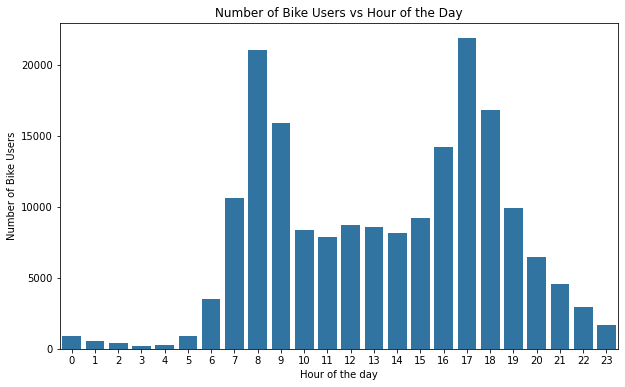

In [8]:
#Plotting a bar chart to visualize the bike users based on the hour of the day
hour = np.arange(0,24)
plt.figure(figsize=(10,6))     
base_color = sns.color_palette()[0]
ax = sns.countplot(data=ford_bike_clean, x ='hour', color=base_color, order=hour)
cat_counts = ford_bike_clean['hour'].value_counts()
plt.title('Bike Users By Hour')
n_points = ford_bike_clean.shape[0]
label("Hour of the day","Number of Bike Users","Number of Bike Users vs Hour of the Day");

#### The peak hours are 8am and 5pm.  It is possible it is when people are going to work and leaving from work to home

## (Visualization 3)
Is there a relationship between average duration spent with the bike and user_type


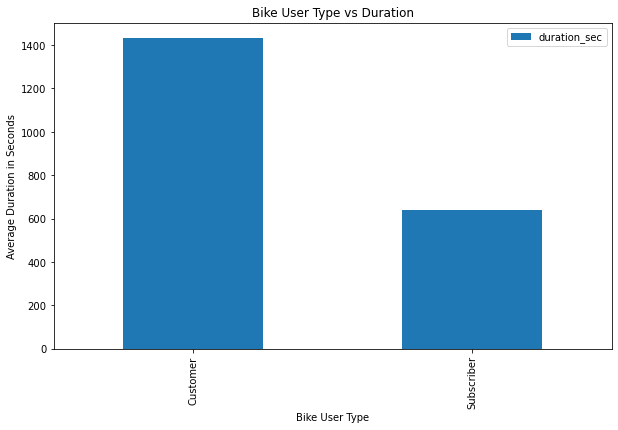

In [9]:
#Plotting a bargraph of the average time subscribers and customers spend time on the bikes
ford_bike_usertype_duration = ford_bike_clean[['user_type','duration_sec']].groupby('user_type').mean()
ford_bike_usertype_duration.plot(kind = 'bar',figsize=(10,6),color = base_color)
label("Bike User Type","Average Duration in Seconds","Bike User Type vs Duration")

#### On average customers seem to spend more time on the bikes than subscribers

## (Visualization 4)
Is there are relationship between duration a user has on the bike, user type and hour of the day



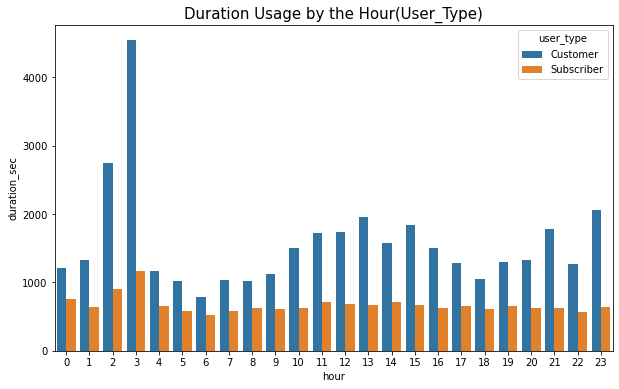

In [10]:
# plotting a barplot to show the relationship between duration, user type and hour of the day
plt.figure(figsize=(10,6))
hour = np.arange(0,24)
sns.barplot(data = ford_bike_clean, x = 'hour',y= 'duration_sec',hue = 'user_type',ci=None)
plt.title('Duration Usage by the Hour(User_Type)', fontsize=15);

#### Customers tend to be spending most time with the bikes at each time of the day with the peak times being 2am and 3am

In [ ]:
!jupyter nbconvert Ford_Bike_System_Data_Part_II_Arnold_Nambubbi_O.ipynb --to slides --post serve --no-input --no-prompt